###### By
### Bernardo Vimpi

# Machine Learning: "Titanic Machine Learning from Disater"

### Classification using Machine Learning

### Project Scope

This project aims to use Machine Learning Technique to uncover the survival rate of passangers in the Titanic using specific features in the Titinic Data Frame.  
Instead of using the entire titanic data frame, we used only a portion of the data: The entire data frame is split into test and train. We then use the train data frame as it if it were the entire data set. Note that this decision is arbitrary since this exercise is for learning purposes only. Thus, the analysis of hereby presented may not be representative of the entire Titanic Data frame. Nonetheless, we apply the common Data Science Methodologis in the train data frame in a manner that reflects how we would apply it in the entire dataset. 

## Dataset

Our data set comes from the "Titanic: Machine Learning from Disaster" https://www.kaggle.com/c/titanic where the entire data can be downloaded. 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the data set

In [3]:
train = pd.read_csv('titanic_train.csv')

## Exploratory Data Analysis (EDA)

In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


### Features

There are several features present in this data frame: 

1- We have a passangerID colmun (Survived) with the values of 0, if they did not survive or 1, if they did survive.

2- Another inportant variable is the Passanger Class (PClass) which is classified as either 1,2 or 3 depending on which class the passangers belonged. 

4- Name and Sex for the name and gender of the passangers. 

5- The Age for each passanger. In some cases we do have missing calues which we'll address in subsequent steps of our analysis. 

6- SibSp, which correponds to the number of Siblings or Spouces aboard.

7- The Parch indicate the number of parents and children aboard.

8- Ticket number for each passenger

9- Fare, corresponding to the monetary value a given passenger paid for the ticket.

10- Cabin which reflects the assigned cabin for each passenger for the durantion of the trip. 

11- Embark: this is the port the passangers boarded the Titanic Ship. The values are "S" for Southampton, C for Cherbourg and Q for Queenstown

### Dataset Info

Next, let use the .info() function to further explore our data set in respect to the columns and dtype.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Values

As we explore our dataset, it is vital to trace any missing values since they have significant impact in our data cleaning, visualization, analysis and, above all, Machine Learning. We use the .isnull() command to evaluate if there are any missing values for our columns in the dataset.

In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


We get boleans of True and False. Here False means it is not null and we have the data. While True it means it is null and we have missing data. 

## Heatmap for Missing Data

As stated above, our data frame has missing values. One of the methods to narrow down our missing values analysis is through the visialization of our data set via a heatmap. 

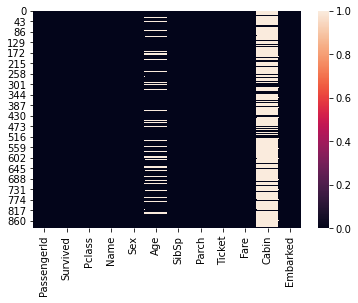

In [8]:
sns.heatmap(train.isnull())

Lets improve our visulaization by adding the further arguments in our code

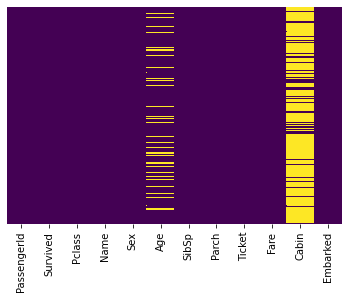

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here, we have created a heatmap of the Boolean values (True and False). To bring this into perspective, every yellow dash corresponds to the True point which stands for a null. 

By taking a quick glance we see that we are missing a lot of data for the Age and Cabin columns. We can say that about 20 to 25 % of the Age data is missing. We'll resolve this via a method of imputation in the subsequent steps. This means that we can use information from other columns to come up with a reasonable value for Age. 

For Cabin, since we are missing a large sum of the data, we can either drop it since we may not need it for our analysis or create a new column, such as "Cabin Known" with values of 0 and 1 corresponding to Unknown and Known values. 

### DATA VISUALIZATION for EXPLORATORY DATA ANALYSIS

A common step in the Exploratory Data Analysis is Data Visizualization. We'll  visualize some, not all, variables that we deem are relevant for our analysis. 

### Survived Count

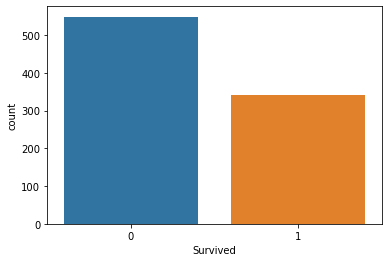

In [10]:
sns.countplot(x = 'Survived', data =train)

For this training dataset we have far more people that didnt survive than thos who survived. We have about 560 who didn't survide while we have just a little above 300 people who did survive. Note that this is baded only on the train dataset.


### Suvived by Gender ("Sex")

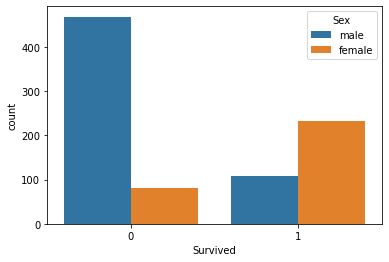

In [11]:
sns.countplot(x='Survived', hue ="Sex", data =train)

Form our analysis we notice that for those who didn't survive, we have more male (470) and female(~80) while among those who survived we have more female( just above 200) while male just a litle above 100.

### Survived by Passanger Class ("Pclass)

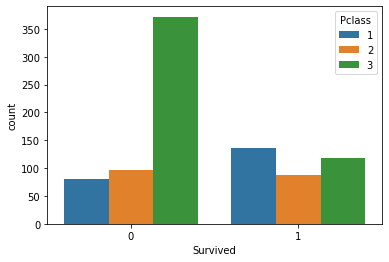

In [12]:
sns.countplot(x='Survived', hue='Pclass', data = train)

Our plot shows that most people who did not survive were part of the 3rd class. While for those who survived, there is still more from the first and 3rd classes but the differences are not astronomical.

### Survived by "Parch"

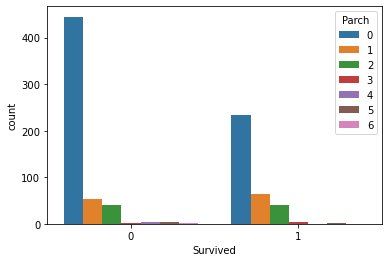

In [13]:
sns.countplot(x="Survived", hue="Parch", data =train)

For the most part we see that for those who didn't survive, likewise for those who survived, had neither parents nor children aboard

## "SibSP" count

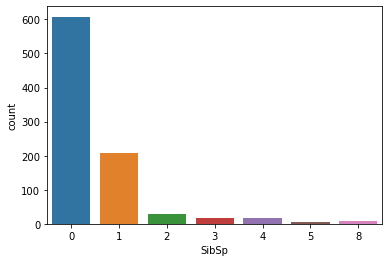

In [14]:
sns.countplot(x="SibSp", data= train)

This plot shows that most of the people on board had neither siblings nor spounce on board. Those are probably the men in the 3rd class. We have a significant number of passangers with 1 another relative on board. That probably was for those who had their spouse on board. 

### Distibution of Fare

In [15]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

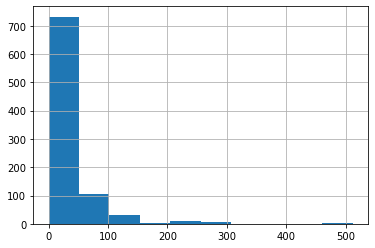

In [16]:
train['Fare'].hist()

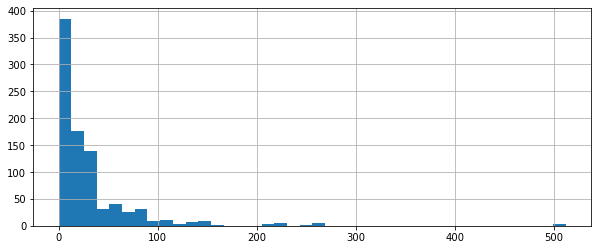

In [17]:
train["Fare"].hist(bins=40, figsize =(10,4))

We have most of the distribution between 0 and 50. That makes sense because we have already uncovered that most passangers were in the 3rd class and we expect that they also had, on average, the lowest fare costs.

### Age Distribution

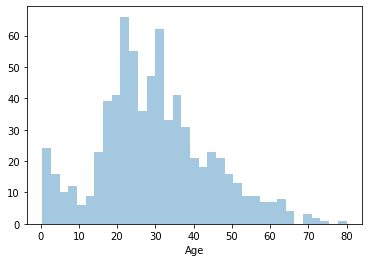

In [18]:
sns.distplot(train['Age'].dropna(), kde =False, bins =35)

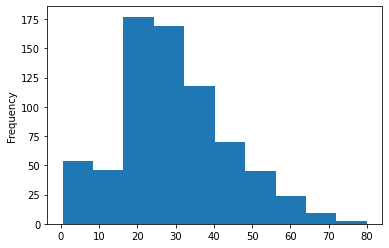

In [19]:
train['Age'].plot.hist()

Here we have a  bimodal distribution where we have quite a few young passangers ages 0 to 10 then we have a jump in average age to about late 20s and mid 30s. Also the older you get the less is your representation on board. Thus, our data is skewed toward young passangers. 

# Data Cleaning

## Imputation and Dealing with missing values

We preveviously uncovered that we have missing data in column "Age". We want to fill in the missing data with an average number instead of dropping all the rows with missing data. One method that we could you is to fill in the mean age of all the passangers. This is the process known as "Imputation". This means we can take the average age and then fill in the missing values with the average age. However, one step we can take here is to look at the average age of passangers by class. 



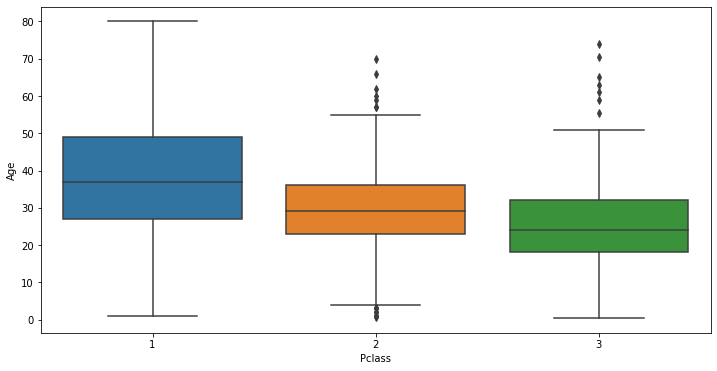

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Pclass", y='Age', data= train)


Our box plot shows that passangers of classes 1 and 2, which also happen to be the wealthier classes, are generally older than the ones from the 3rd class. We can then use the average of these classes age to impute the missing values of passangers, based on their classes.

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

### Heatmap

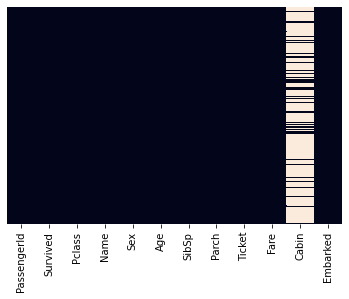

In [23]:
sns.heatmap(train.isnull(),yticklabels = False, cbar=False)

As we can see from the plot, we are no longer missing values for the Age column. 

### Dropping the "Cabin" column

From the heatmap we see that we are missing too many values for the Cabin column. We could create another variable of 0 and 1 but since its too many value missing we can simply go ahead and drop the cabin column. 

In [24]:
train.drop('Cabin', axis=1, inplace=True)

In [25]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


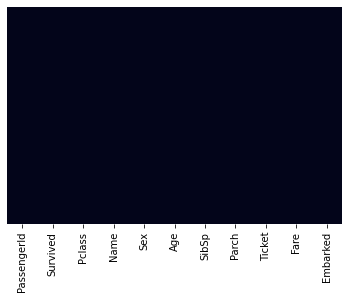

In [26]:
sns.heatmap(train.isnull(),yticklabels = False, cbar=False)

The Cabin column has been successfully dropped. We have only missing values in Embarked. However since that seems to be the only missing value in our train dataset, we can proceed and drop all missing values. 

### Dropping all missing values

In [27]:
train.dropna(inplace=True)

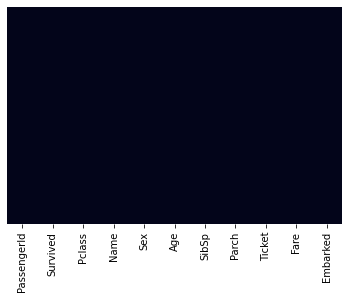

In [28]:
sns.heatmap(train.isnull(),yticklabels = False, cbar=False)

Now we have our data cleaned and there are no missing values.

## Dealing with Categorical Features

In our dataset we have some categorical features. For the purpose of Machine Learning, we'll need to convert our categorical features into dummy variables. Otherwise the machine learning wont take those features as inpute.For example, in the Sex Column we have a categorical feature of Male and Female. We can encode these values into 0 and 1 if someone is Male or not. We'll also apply the same technique for the Embarked Column.

In [29]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


We have a multicolinearity issue here: Based on our data transformation a Machine Learning algorithm will know if,for instance, the value for female is 0 then it will predict 1 for male. This will create a problem for the algorithm because a group of columns will be a perfect predictor for other set of columns. To remedy this issue, we add another argument to our code as below: 

In [30]:
pd.get_dummies(train['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Now we can see that it dropped the other column. This one is what we need to add to our Machine Learning Algorithm.

In [31]:
sex= pd.get_dummies(train['Sex'], drop_first=True)

In [32]:
sex.head(10)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


we can proceed with the same method and apply it to the embark column. 

In [33]:
embark= pd.get_dummies(train['Embarked'], drop_first=True)

In [34]:
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Not all the columns are perfect predictor of each other because we dropped the "C" column.

## Data Concatination

After the above data cleaning and transformation, we can proceed and add ( or concatinate) our new columns in to the train data frame

In [35]:
train = pd.concat([train, sex, embark], axis= 1)

In [36]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0


Now we have the new columns, Male, Q and S which we'll use for our Machine Learning Algorithm. Also, we no longer need the embarked column because we already included it in the Q and S and we also dont need the Sex collumn because it is already in the new Male column. The Ticket and Name columns are not that useful to us at the moment. In that case, we'll proceed and drop these columns. 

### Dropping columns: "Ticket" and "Name".

In [37]:
train.drop (['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [38]:
train.head(6)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,24.0,0,0,8.4583,1,1,0


Now our data frame is suitable for Machine Learning. The data frame is of a numerical type and everything is concatinated. 

### Analysis of Numerical Column: "PassengerId"

The PassengerId is a numerical column with an index that starts at 1. We can doublecheck this using the tail of our data frame just to be sure. 

In [39]:
train.tail(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
881,882,0,3,33.0,0,0,7.8958,1,0,1
882,883,0,3,22.0,0,0,10.5167,0,0,1
883,884,0,2,28.0,0,0,10.5000,1,0,1
884,885,0,3,25.0,0,0,7.0500,1,0,1
885,886,0,3,39.0,0,5,29.1250,0,1,0
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0
890,891,0,3,32.0,0,0,7.7500,1,1,0


The tail of our data frame confirms that the PassengerId is a numeric type with index ending in 890. This is important to know because even though its a numerical, since it is indexed, it will not be useful to us and we'll not be able to use it to predict if a passenger survived based on their position in the index. For that reason, we can proceed and drop the PassengerId column.

In [40]:
train.drop('PassengerId', axis=1, inplace = True)

In [41]:
train.head(6)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0


At this point, we have the Survived Columns with the values 0 or 1. This is great because it is our label column.

The Pclass column as the numeric indication of the class the passengers were in.

We also have the Age column. 

The SibSp for how many Siblings or Spouces they had on board. 

The Parch, Fare Male and if they embarked at Q or at S. 

Interestingly enough is the Pclass column which is a categorical column meaning that it can have the values of 1,2 or 3. We can also convert that column to get te dummies for it, as needed. However, for exercise purposes, we can simpy run our model and it is. Later on, we can get the dummies for the Pclass and run another model and compare the result as to how the Machine Learning Algorithm reacts to the column being treated as a category versus as a continous variable. Which could be another extension of this project.

## Summary Statistics of the Data frame

In [42]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


# Machine Learning

We are treating the train data set as if it were the entire dataset. Now we need to split the train data set into train and test.

### Train and Test Data

In [43]:
X= train.drop('Survived', axis =1)
y=train['Survived']# this is the column we are trying to predict

### Split the Data into Train and Test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state=101)

## Machine Learning Model

Now that we have our X_train, X_test, y_train and y_test, we can now predict by creating a model using Logistic Regression. We import our Logistic Regression using sklean.linear_model.

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lgmodel = LogisticRegression()

We now have created our model. Next we need to train our model

In [48]:
lgmodel.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions

In [49]:
predictions= lgmodel.predict(X_test)

Now we have already created a model, fit a mode and predict a model. 

## Model Evaluation

For model evaluation, we'll use classification_report from Sklean to tell us the precision and recall values and accuracy scores and F1-Score. That also saves us  time to read them off the Confusion Matrix.

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



### Using Confusion Matrix


Alternatevely, we can also use the Confusion Matrics instead of the classification report. Most often this is a matter of preference. However, for learning purpose, it is always a good idea to check both. 

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

### Model Improvement

The model can be improved by using the entire data set instead of a portion of the data set only. 
We can also increase our Precision and Recall Accuracy. This can be done by using the entire training set and compare it to test set, instead of splitting our train set into both train and test. 
Another alternative to improve our model is to use feature engineering by taking the title of the passangers names and use that as a feature, such as Dr. Mrs. Mr etct. Perhaps the cabing letter can also be a feature. The Ticket can also be explored for any possible feature engineering. 

## Thank You

### Bernardo Vimpi